### Frozen Lake Enviornment
Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The enviornment we loaded ```FrozenLake-v1``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice.

There are:
- 16 states (one for each square) 
- 4 possible actions (0: Left, 1: Down, 2: Right, 3: Up)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)



In [1]:
import gym
import numpy as np
import time

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")

STATES = env.observation_space.n
ACTIONS = env.action_space.n

print(f"States:{STATES}, Actions:{ACTIONS}")

States:16, Actions:4


### Building the Q-Table
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [2]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Constants
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [3]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

ALPHA = 0.81 # learning rate
GAMMA = 0.96 # Discount Factor

### Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [4]:
epsilon = 0.9  # start with a 90% chance of picking a random action

In [5]:
RENDER = False # if you want to see training set to true

rewards = []

for episode in range(EPISODES):
    
    state = env.reset()[0]
    
    for _ in range(MAX_STEPS):
        
        if RENDER:
            env.render()
        
        if np.random.uniform(0, 1) < epsilon: # we will check if a randomly selected value is less than epsilon.
            action = env.action_space.sample() # take random action
        else:
            action = np.argmax(Q[state,:]) # use Q table to pick best action based on current values
            
        new_state, reward, terminated, truncated, _ = env.step(action)
        
        # formula we discussed
        Q[state, action] = Q[state, action] + ALPHA * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])
        
        state = new_state
        
        if terminated:
            rewards.append(reward)
            epsilon -= 0.001
            break # reached goal
            
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")
# and now we can see our Q values!

[[0.78275779 0.8153727  0.8153727  0.78275779]
 [0.78275779 0.         0.84934656 0.81537269]
 [0.8153727  0.884736   0.81523488 0.84934656]
 [0.84933737 0.         0.3491673  0.75604953]
 [0.8153727  0.84934656 0.         0.78275779]
 [0.         0.         0.         0.        ]
 [0.         0.9216     0.         0.84934648]
 [0.         0.         0.         0.        ]
 [0.84934656 0.         0.884736   0.8153727 ]
 [0.84934656 0.9216     0.9216     0.        ]
 [0.884736   0.96       0.         0.884736  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9216     0.96       0.884736  ]
 [0.9216     0.96       1.         0.9216    ]
 [0.         0.         0.         0.        ]]
Average reward: 0.7625


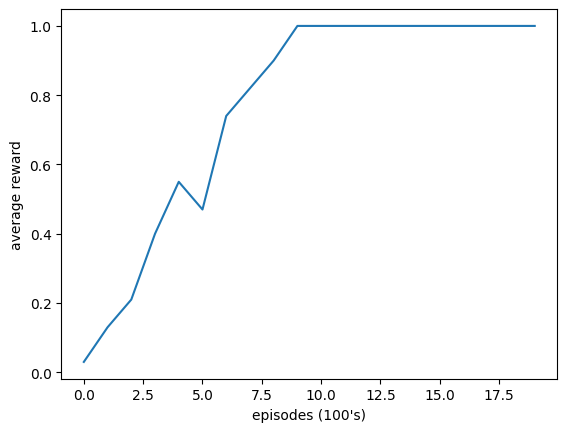

In [6]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()